In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
plt.style.use('dark_background')

In [177]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
df=pd.read_csv('/content/drive/MyDrive/cases/Top 1000 Bollywood Movies and their boxoffice.csv',index_col='Unnamed: 0')

In [179]:
df.head()

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,1,Pathaan,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,2,Baahubali 2 The Conclusion,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,3,KGF Chapter 2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,4,Dangal,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,5,Sanju,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster


In [180]:
df.tail()

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
995,996,Nikamma,0,20000000,20000000,0,10000000,0
996,997,Saugandh,30000000,20000000,30000000,0,20000000,Average
997,998,Akaash Vani,30000000,20000000,20000000,0,100000000,Disaster
998,999,Zwigato,10000000,20000000,10000000,0,10000000,0
999,1000,FryDay,20000000,20000000,20000000,0,150000000,Disaster


In [181]:
df.sample(5)

,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
813,814,One Two Three,0,70000000,0,0,10000000,0
714,715,Table No. 21,170000000,100000000,140000000,30000000,80000000,Below Average
57,58,Judwaa 2,2270000000,1380000000,1920000000,350000000,650000000,SuperHit
952,953,Disco Dancer,1000000000,30000000,60000000,940000000,20000000,Hit
757,758,Aksar 2,120000000,90000000,110000000,0,90000000,Flop


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           1000 non-null   int64 
 1   Movie        1000 non-null   object
 2   Worldwide    1000 non-null   int64 
 3   India Net    1000 non-null   int64 
 4   India Gross  1000 non-null   int64 
 5   Overseas     1000 non-null   int64 
 6   Budget       1000 non-null   int64 
 7   Verdict      1000 non-null   object
dtypes: int64(6), object(2)
memory usage: 70.3+ KB


In [183]:
df.isna().sum()

SN             0
Movie          0
Worldwide      0
India Net      0
India Gross    0
Overseas       0
Budget         0
Verdict        0
dtype: int64

In [184]:
df.duplicated().sum()

0

This Data set has no duplicate and null values 🙃

In [185]:
df.describe()

,SN,Worldwide,India Net,India Gross,Overseas,Budget
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,500.500000,1.832870e+09,4.079600e+08,6.126900e+08,9.714300e+08,5.889000e+08
std,288.819436,1.049006e+10,5.783055e+08,9.814085e+08,8.596981e+09,2.101992e+09
min,1.000000,0.000000e+00,2.000000e+07,0.000000e+00,0.000000e+00,0.000000e+00
25%,250.750000,1.600000e+08,9.000000e+07,1.400000e+08,1.000000e+07,8.000000e+07
50%,500.500000,3.700000e+08,2.000000e+08,3.100000e+08,5.000000e+07,2.000000e+08
75%,750.250000,9.025000e+08,4.600000e+08,6.825000e+08,1.500000e+08,4.000000e+08
max,1000.000000,1.897000e+11,5.240000e+09,1.416000e+10,1.690200e+11,3.200000e+10


In [186]:
df.isna().sum().any().tolist()

False

In [187]:
df.columns

Index(['SN', 'Movie', 'Worldwide', 'India Net', 'India Gross', 'Overseas',
       'Budget', 'Verdict'],
      dtype='object')

In [188]:
df.Movie.nunique()

994

In [189]:
df.Verdict.value_counts()

Flop                    197
Hit                     194
Average                 134
SuperHit                112
Disaster                 85
Blockbuster              74
Below Average            68
Above Average            55
0                        51
All Time Blockbuster     30
Name: Verdict, dtype: int64

In [190]:
df['Verdict']=df['Verdict'].replace('0','Neutral')

In [191]:
df.Verdict.value_counts()

Flop                    197
Hit                     194
Average                 134
SuperHit                112
Disaster                 85
Blockbuster              74
Below Average            68
Above Average            55
Neutral                  51
All Time Blockbuster     30
Name: Verdict, dtype: int64

#Analysis

Top 5 Releases worldwide (values in cr.)

In [192]:
releases=df[['Movie','Worldwide']].sort_values(by='Worldwide',ascending=False).head(5)
releases['Worldwide']=releases['Worldwide']/1e9
releases

,Movie,Worldwide
78,Avengers End Game,189.70
66,Avatar: The Way of Water,173.80
867,Top Gun: Maverick,122.50
235,Spider-Man: No Way Home,101.70
490,Black Panther: Wakanda Forever,66.34


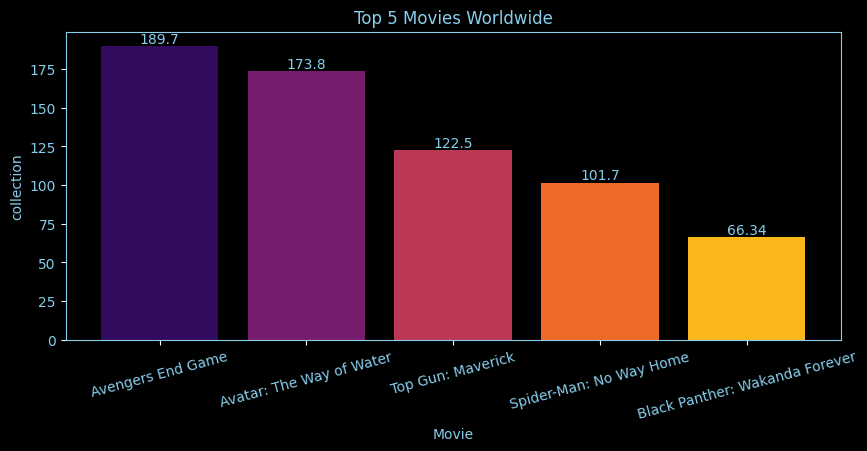

In [193]:
palette=sns.color_palette('inferno',len(releases))
plt.figure(figsize=(10,4))
bar=plt.bar(releases['Movie'],releases['Worldwide'],color=palette)

plt.xticks(rotation=15,ha='center',color='skyblue')
plt.yticks(color='skyblue')
plt.xlabel('Movie',color='skyblue')
plt.ylabel('collection',color='skyblue')
plt.title('Top 5 Movies Worldwide',color='skyblue')

for i, value in zip(bar, releases['Worldwide']):
    plt.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.05,round(float(value),2), ha='center', va='bottom',color='skyblue')
for spine in plt.gca().spines.values():
  spine.set_color('skyblue')







'Avengers End Game' is on top as per worldwide collection

#Top 5 Indian Releases (values in cr.)

In [194]:
indian_releases=df[['Movie','India Net']].sort_values(by='India Net',ascending=False).head(5)
indian_releases['India Net']=indian_releases['India Net']/1e9
indian_releases


,Movie,India Net
0,Pathaan,5.24
1,Baahubali 2 The Conclusion,5.10
2,KGF Chapter 2,4.35
3,Dangal,3.74
4,Sanju,3.42


In [195]:
palette=sns.color_palette('rainbow',len(indian_releases))
fig=go.Figure(data=go.Bar(x=indian_releases['Movie'],y=indian_releases['India Net'],marker_color='skyblue'))
fig.update_layout(title='Top 5 Indian Releases',xaxis_title='Movies',yaxis_title='Collection')
fig.update_traces(hovertemplate='Movie: %{x}<b> India Net Collection:%{y}')

'Pathan' is on top as per Indian Releases

In [196]:
df.columns

Index(['SN', 'Movie', 'Worldwide', 'India Net', 'India Gross', 'Overseas',
       'Budget', 'Verdict'],
      dtype='object')

#Top 5 movies by Budget (values in cr.)

In [197]:
budget_release=df[['Movie','Budget']].sort_values(by='Budget',ascending=False).head(5)
budget_release['Budget']=budget_release['Budget']/1e9
budget_release

,Movie,Budget
66,Avatar: The Way of Water,32.0
78,Avengers End Game,25.0
376,Thor: Love And Thunder,19.0
932,No Time To Die,18.5
486,Black Adam,15.0


In [198]:
fig=go.Figure(data=go.Bar(x=budget_release['Movie'],y=budget_release['Budget']))
fig.update_layout(title='Top 5 Movies in Budget',xaxis_title='Movies',yaxis_title='collection')
fig.update_traces(hovertemplate='Movie: %{x}<b> Budget collection:%{y}')

'Avatar: The Way of Water' had the highest budget allocated

#Distribution of Verdicts


Text(0.5, 1.0, 'Distribution of Verdicts')

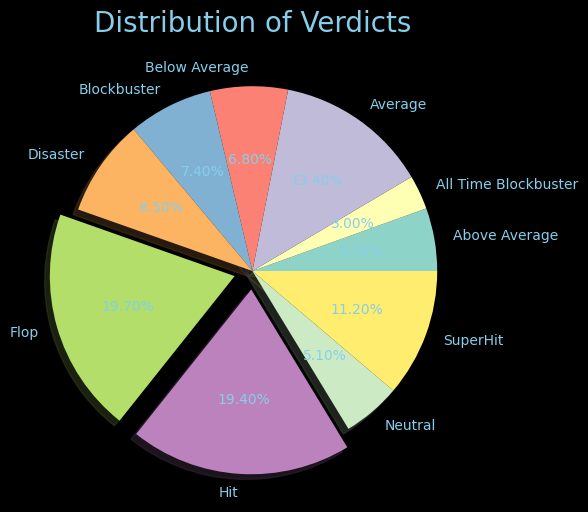

In [199]:
verdict_df = df.groupby("Verdict").size().reset_index(name="Count")
explode=(0,0,0,0,0,0,0.1,0.1,0,0)
plt.figure(figsize=(12,6))
plt.pie(verdict_df['Count'],labels=verdict_df['Verdict'],autopct='%1.2f%%',shadow=True,explode=explode,textprops={'color': 'skyblue'})
plt.title("Distribution of Verdicts", fontsize=20,color='skyblue')



40% movies were either Flop or Hit (19.7% Flop and 19.4% Hit)

<Figure size 1000x600 with 0 Axes>

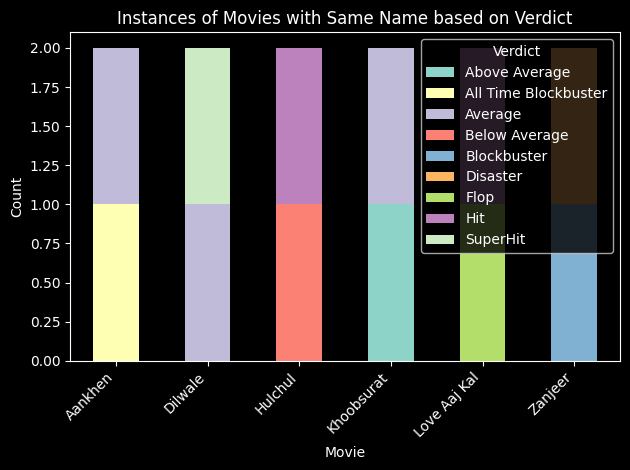

In [210]:
same_name_movie=df[df.duplicated('Movie',keep=False)].sort_values(by='Movie')
grouped_movie=same_name_movie.groupby(['Movie','Verdict']).size().unstack()
plt.figure(figsize=(10,6))
grouped_movie.plot(kind='bar',stacked=True)
plt.xlabel('Movie')
plt.ylabel('Count')
plt.title('Instances of Movies with Same Name based on Verdict')
plt.xticks(rotation=45, ha='right')
plt.legend(title="Verdict")
plt.tight_layout()
plt.show()


There are 6 movies which are released with same name but their verdicts were changed after releasing again with same name may be because of new story or actors' performance

#Insights
* Avengers End Game is on top as per worldwide collection.
* 'Pathan' is on top as per Indian Releases.
* 'Avatar: The Way of Water' had the highest budget allocated.
* 40% movies were either Flop or Hit (19.7% Flop and 19.4% Hit).
* There is 6 movies which are released with same name but their verdicts were changed after releasing again with same name may be because of new story or actors' performance





